<ipython-input-1-7829fddf15cd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='Blues')


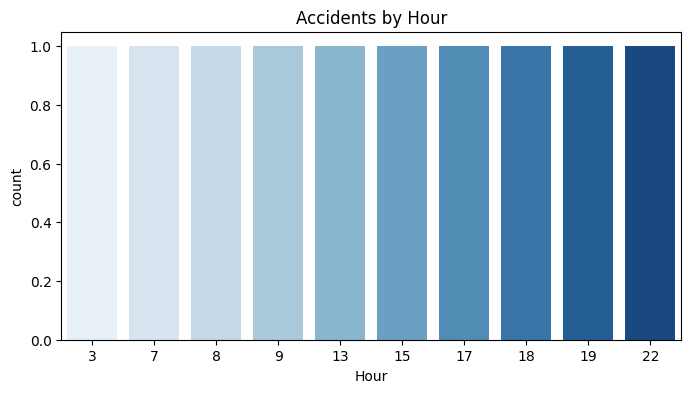

<ipython-input-1-7829fddf15cd>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().index, palette='coolwarm')


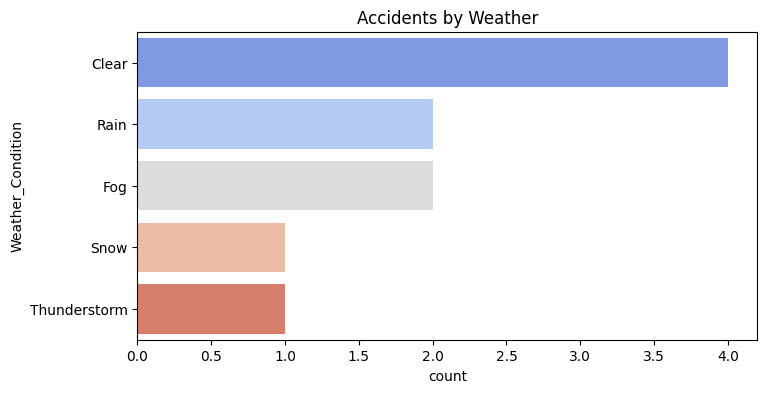

<ipython-input-1-7829fddf15cd>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Road_Condition', data=df, order=df['Road_Condition'].value_counts().index, palette='muted')


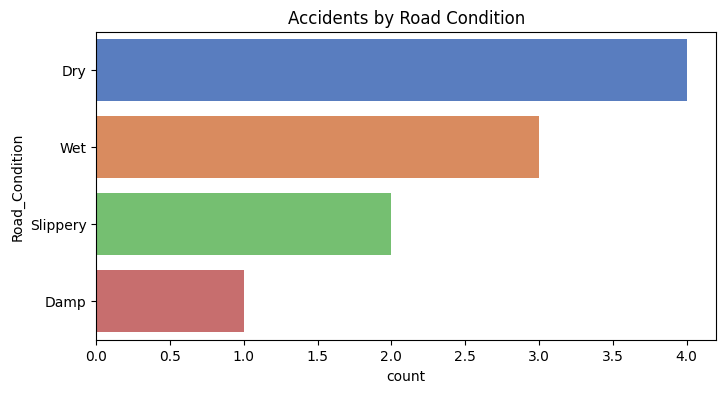

In [1]:
!pip install folium --quiet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from io import StringIO

data = StringIO("""
Start_Time,Start_Lat,Start_Lng,Weather_Condition,Road_Condition
2024-06-01 08:30:00,34.0522,-118.2437,Clear,Dry
2024-06-01 17:45:00,36.7783,-119.4179,Rain,Wet
2024-06-02 22:15:00,40.7128,-74.0060,Fog,Damp
2024-06-02 03:30:00,41.8781,-87.6298,Snow,Slippery
2024-06-03 13:20:00,29.7604,-95.3698,Clear,Dry
2024-06-03 18:45:00,33.4484,-112.0740,Thunderstorm,Wet
2024-06-04 07:10:00,39.7392,-104.9903,Fog,Slippery
2024-06-04 15:00:00,32.7157,-117.1611,Clear,Dry
2024-06-05 09:25:00,47.6062,-122.3321,Rain,Wet
2024-06-05 19:30:00,39.9526,-75.1652,Clear,Dry
""")

df = pd.read_csv(data, parse_dates=['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour

plt.figure(figsize=(8,4))
sns.countplot(x='Hour', data=df, palette='Blues')
plt.title('Accidents by Hour')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().index, palette='coolwarm')
plt.title('Accidents by Weather')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(y='Road_Condition', data=df, order=df['Road_Condition'].value_counts().index, palette='muted')
plt.title('Accidents by Road Condition')
plt.show()

map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=4)
HeatMap(data=df[['Start_Lat', 'Start_Lng']]).add_to(accident_map)
accident_map.save("hotspot_map.html")

from IPython.display import HTML
HTML('<a href="hotspot_map.html" target="_blank">View Accident Hotspot Map</a>')
